In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import RMSprop

In [137]:
reconstructed_model =  keras.models.load_model("digit_recognizer_best_model.h5")
# reconstructed_model.summary()

In [9]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.5728355e-16, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

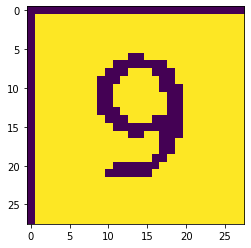

In [158]:
# test_image = cv2.imread('crop_img/crop_1.png')
# plt.imshow(test_image)
# test_image_resized = test_image.reshape(28,28,1)
test_image = Image.open('crop_img/crop_69.png')
test_image_resized = test_image.resize((28,28))

test_image_resized.save('crop_img/crop_72_resized.png')
test_image_resized_2 = cv2.imread('crop_img/crop_72_resized.png')
test_image_resized_gray = cv2.cvtColor(test_image_resized_2,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(test_image_resized_gray,140,255,cv2.THRESH_BINARY)

plt.imshow(thresh)
# np_img_2 = np.asarray(test_image_resized)
np_img_3 = thresh.reshape([-1,28, 28,1])
reconstructed_model.predict(np_img_3)

In [85]:
test_image = cv2.imread('crop_img/crop_1.png')
# plt.imshow(test_image)
test_image_resized = test_image.resize((28,28))
# plt.imshow(test_image_resized)
np_img_2 = np.asarray(test_image_resized,dtype='float32')
# plt.imshow(np_img_2)
test_image_resized.shape
# np_img_3 = np_img_2.reshape([-1,28, 28,1])
# reconstructed_model.predict(np_img_3)

AttributeError: 'NoneType' object has no attribute 'shape'

In [135]:
reconstructed_model =  keras.models.load_model("digit_recognizer_best_model.h5")
# old_input = reconstructed_model._layers.pop(0)
newInput = keras.Input(batch_shape=(133,133,1),name = "digits")
# newOutputs = reconstructed_model(newInput)
# newModel = keras.Model(newInput, newOutputs)
reconstructed_model._layers[0] = newInput

In [136]:
reconstructed_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvLayer3 (Conv2D)          (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
ConvLayer4 (Conv2D)          (None, 8, 8, 64)          18496     
_________________________________________________________________
ConvLayer5 (Conv2D)          (None, 6, 6, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
ConvLayer6 (Conv2D)          (None, 4, 4, 128)        

AttributeError: 'KerasTensor' object has no attribute 'trainable_weights'